In [10]:
def binary_search(arr,elem):
    start = 0; end = len(arr) - 1

    while start <= end:
        mid = (start + end) // 2
        if arr[mid] == elem:
            return mid
        if arr[mid] > elem:
            high = mid -1
        else:
            low = mid + 1    

    return None

In [11]:
def rec_binary_search(arr,elem, start = 0, end = None):
    end = len(arr) - 1 if not end else end
    mid = (start + end) // 2
    
    if   elem  == arr[mid]:
        return mid
    elif elem  <  arr[mid]:
        return rec_binary_search(arr, elem, start , mid - 1)
    else:
        return rec_binary_search(arr, elem, mid + 1, end)

In [12]:
def find_largest(arr):
    largest = arr[0]
    largest_index = 0
    for i in range(1,len(arr)):
        if arr[i] < largest:
            largest = arr[i]
            largest_index = i
    return largest_index

def selection_sort(arr):
    newArr = []
    for i in range(len(arr)):
        largest = find_largest(arr)
        newArr.append(arr.pop(largest))
    return newArr

In [18]:
def euclidean_algorithm(a,b):
    if a > b:
        a,b = b,a
    if a == 0:
        return b
    else:
        return euclidean_algorithm(a, b % a)

In [14]:
def sum(arr):
    if arr ==[]:
        return 0
    else:
        return arr[0] + sum(arr[1:])

In [15]:
def num_of_elements(arr):
    if arr == []:
        return 0
    else:
        return 1 + num_of_elements(arr[1:])

In [23]:
def quick_sort(arr):
    if len(arr) < 2:
        return arr
    else:
        pivot = arr[0]
        less = [i for i in arr[1:] if i <= pivot]
        greater = [i for i in arr[1:] if i > pivot]
        return quick_sort(less) + [pivot] + quick_sort(greater)

In [47]:
from random import random
def random_numbers(n):
    return [random() for _i in range(n)]

In [51]:
from collections import deque
def person_is_seller(name):
    return name[-1] == 'm'
def search_queue(que):
    while que:
        person = que.popleft()
        if person_is_seller(person):
            print( person + 'is a mango seller')
            return True
        else:
            que += graph[person]
    return False

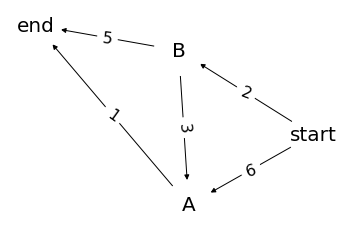

In [95]:
import networkx as nx 
dg = nx.DiGraph()
dg.add_edges_from([("start","B"),("start","A"),("B","A"),("B","end"),("A","end")])
edge_labels = {("start","B"):2,("start","A"):6,("B","A"):3,("B","end"):5,("A","end"):1}
pos = nx.spring_layout(dg)

nx.draw_networkx_edge_labels(dg,pos,edge_labels=edge_labels, font_size=16)
nx.draw_networkx_labels(dg, pos, font_size=20, font_color='k')
nx.draw(dg, pos, node_size=2500, node_color="w")


In [2]:
# A graph Hash Table
graph = {}

graph["start"] = {}
graph["start"]["a"] = 6
graph["start"]["b"] = 2

graph["a"] = {}
graph["a"]["end"] = 1

graph["b"] = {}
graph["b"]["a"] = 3
graph["b"]["end"] = 5
graph["end"] = {}

# A costs Hash Table
inf = float("inf")
costs = {}
costs["a"] = 6
costs["b"] = 2
costs["end"] = inf

# A parents Hash Table
parents = {}
parents["a"] = "start"
parents["b"] = "start"
parents["end"] = None

# A tuple that record processed notes
processed = []

def find_lowest_cost_node(costs):
    lowest_cost = float ("inf")
    lowest_cost_node = None
    for node in costs:
        cost = costs[node]
        if cost < lowest_cost and node not in processed:
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node

node = find_lowest_cost_node(costs)
while node is not None:
    cost = costs[node]
    neighbours = graph[node]
    for n in neighbours.keys():
        new_cost = cost + neighbours[n]
        if costs[n] > new_cost:
            costs[n] = new_cost
            parents[n] = node
    processed.append(node)
    node = find_lowest_cost_node(costs)

def get_shortest_path(node='end'):
    if node == 'start':
        return 'start'
    else:
        return get_shortest_path(parents[node]) + ' -> '  + node

get_shortest_path('end'), costs['end']

('start -> b -> a -> end', 6)

In [4]:
class Node(object):
    def __init__(self,name):
        self._name = name
        self._node = {}

    def get_node(self):
        return self._node
    def get_name(self):
        return self._name
        
    def add_next_node(self,key,value):
        self._node[key] = value
    def set_value(self,value):
        self.value = value
    def set_parent(self,parent):
        self.parent = parent

In [5]:
class Tree(object):
    def __init__(self,name):
        self._name = name
        self._tree = {}

    def add_node(self,node):
        _node_name = node.get_name()
        _node = node.get_node()
        self._tree[_node_name] = {}
        for key in _node.keys():
            self._tree[_node_name][key] = _node[key]

    def get_tree(self):
        return self._tree

In [9]:
start = Node('start')
start.add_next_node('a', 6)
start.add_next_node('b', 2)

a = Node('a')
a.add_next_node('end', 1)

b = Node('b')
b.add_next_node('a', 3)
b.add_next_node('end', 5)

end = Node('end')

graph_tree = Tree('graph')
graph_tree.add_node(start)
graph_tree.add_node(a)
graph_tree.add_node(b)
graph_tree.add_node(end)

graph_tree.get_tree()

{'start': {'a': 6, 'b': 2},
 'a': {'end': 1},
 'b': {'a': 3, 'end': 5},
 'end': {}}